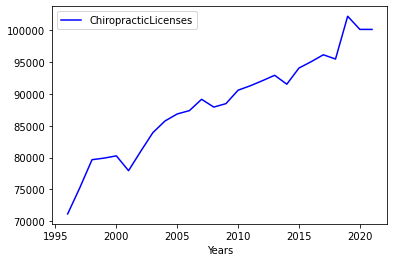

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import display
from scipy import linalg
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.integrate import odeint
import scipy.stats as st
import math

Years = [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
Chiropractors = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65125,65803,65807,66487,66638,66254,66173,66323,66861,65939,67736]
ChiropracticMarketSizeMillions = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14746.5,15100.5,15194,15249.2,15653.5,15997.2,16307.4,16700.8,17348.7,16615,17872.5]
ChiropracticLicenses = [71162,75282,79674,79928,80280,77951,80990,83929,85764,86858,87382,89161,87938,88478,90591,91283,92084,92930,91535,94071,95064,96152,95483,102202,100136,100136]

data=list(zip(Years,Chiropractors,ChiropracticMarketSizeMillions,ChiropracticLicenses))
df=pd.DataFrame(data = data, columns=['Years', 'Chiropractors','ChiropracticMarketSizeMillions','ChiropracticLicenses'])
#Graphs from all possible license data points.
data = df.loc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]

df.to_csv('chiro.csv', index=False)
df=pd.read_csv('chiro.csv')

#Graphs from when I have all data points except last license year (2021)
fullData = df.loc[[15,16,17,18,19,20,21,22,23,24,25]]

totalLicensesByYear = data.plot(x='Years',y='ChiropracticLicenses',color=['b'])
plt.show()

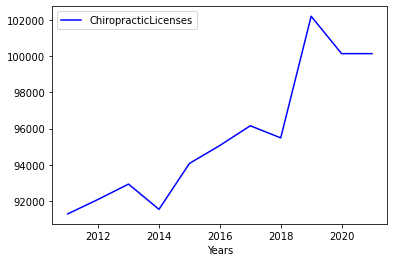

In [8]:
licensesByYear = fullData.plot(x='Years',y='ChiropracticLicenses',color=['b'])
plt.show()

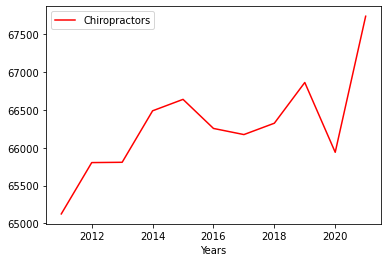

In [7]:
chiroByYear = fullData.plot(x='Years',y='Chiropractors',color=['r'])
plt.show()

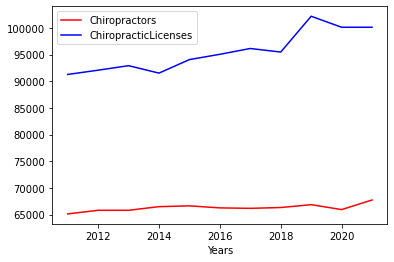

In [6]:
licensesVSchiro = fullData.plot(x='Years',y=['Chiropractors','ChiropracticLicenses'],color=['r','b'])
plt.show()

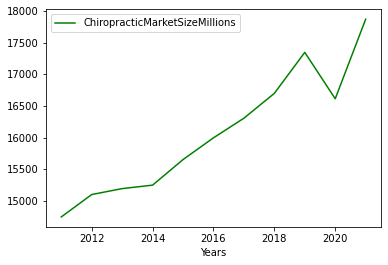

In [5]:
marketSizeByYear = fullData.plot(x='Years',y=['ChiropracticMarketSizeMillions'],color=['g'])
plt.show()

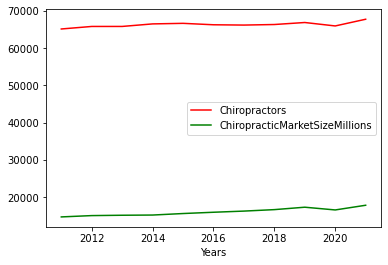

In [4]:
chiroVSmarketSize = fullData.plot(x='Years',y=['Chiropractors','ChiropracticMarketSizeMillions'],color=['r','g'])
plt.show()

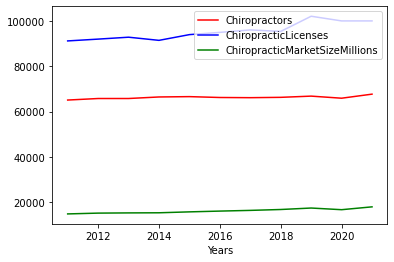

In [3]:
licensesVSchiroVSmarketSize = fullData.plot(x='Years',y=['Chiropractors','ChiropracticLicenses','ChiropracticMarketSizeMillions'],color=['r','b','g'])
plt.show()

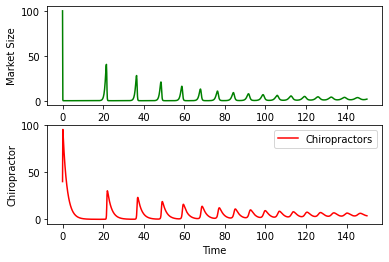

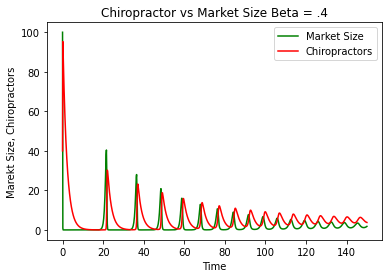

In [2]:
y0 = [100,40] #[prey, predators]

t = np.linspace(0,150,num=1000)

alpha= 2 #rate of americans seeking care if no chiro
beta = 0.4 #rate of americans no longer needing care
delta = 0.6 #rate of new chiros in America due to increased market size
gamma = 0.5 #rate of chiros losing licenses or no longer practicing
k = 100

params = [alpha, beta, delta, gamma, k]

def sim(varibles, t, params):
    
    #prey population level
    m = varibles[0]
    
    #predator population level
    c = varibles[1]
    
    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]
    k = params[4]
    
    dxdt = alpha*m*(1-(m/k)) - beta*m*c
    dydt = (delta)*(beta)*m*c - gamma*c
    
    return([dxdt, dydt])

y = odeint(sim, y0, t, args=(params,))

f,(ax1,ax2) = plt.subplots(2)

line1, = ax1.plot(t,y[:,0], label = 'Market Size',  color = 'g')
line2, = ax2.plot(t,y[:,1], label = 'Chiropractors', color = 'r')
plt.legend()

ax1.set_ylabel('Market Size')
ax2.set_ylabel('Chiropractor')
ax2.set_xlabel('Time')

plt.show()

plt.plot(t,y[:,0], label = 'Market Size', color = 'g')
plt.plot(t,y[:,1], label = 'Chiropractors', color = 'r')
plt.legend()

plt.title('Chiropractor vs Market Size Beta = .4')  
plt.xlabel('Time')
plt.ylabel('Marekt Size, Chiropractors')

plt.show()